Импортируем необходимые библиотеки

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

Мне нужно построить график функции $f(x) = e^{x}$. Создам функцию, которая будет возвращать значение $f(x)$ от $x$.

In [3]:
def func(x):
    return np.exp(x)

Задам интервал построения графика $x \in [0, 1]$. Сделаю точность построения графика, равной 1000 точек. Количество делений участка задается переменной count_of_division


In [4]:
x_min = 0
x_max = 1
count_values = 1000
count_of_division = 5

Строим график для функции с помощью библиотеки matplotlib

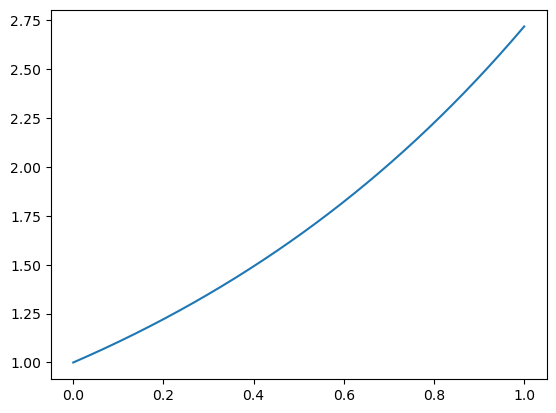

In [5]:
def print_function(ax):
    x_values = np.linspace(x_min, x_max, count_values)
    y_values = func(x_values)
    ax.plot(x_values, y_values)
    plt.show()

fig, ax = plt.subplots()
print_function(ax)

Создам также DataFrame, в котором будут храниться все значения функции, это понадобится для создания верхних и нижних сумм

In [6]:
x_n_values = np.linspace(x_min, x_max, count_values)
y_n_values = func(x_n_values)
data_all_values = {'X_i' : x_n_values, 
        'Y_i' : y_n_values}
df_all_values = pd.DataFrame(data_all_values)
df_all_values

,X_i,Y_i
0,0.000000,1.000000
1,0.001001,1.001002
2,0.002002,1.002004
3,0.003003,1.003008
4,0.004004,1.004012
...,...,...
995,0.995996,2.707420
996,0.996997,2.710131
997,0.997998,2.712845
998,0.998999,2.715562


Создаем таблицу df_up_down, которую будем использовать для вывода верхних и нижних сумм Дарбу. В ней будем хранить $N$ значений $x$ и $y$ при определенном делении участка на $N$. Количество делений участка задается переменной count_of_division

In [7]:
n_values_of_down = []
n_values_of_up = []
x_n_values = np.linspace(x_min, x_max, count_of_division+1)

for i in range(len(x_n_values)-1):
    diff_1 = (df_all_values['X_i'] - x_n_values[i]).abs()
    diff_2 = (df_all_values['X_i'] - x_n_values[i+1]).abs()
    index_1 = diff_1.idxmin()
    index_2 = diff_2.idxmin()
    y_down = df_all_values.loc[index_1 : index_2+1, 'Y_i'].min()
    y_up = df_all_values.loc[index_1 : index_2+1, 'Y_i'].max()
    n_values_of_down.append(y_down)
    n_values_of_up.append(y_up)

n_values_of_down.append('-')
n_values_of_up.append('-')

data_down_and_up = {'X_n': x_n_values,
        'Y_n_down': n_values_of_down,
         'Y_n_up' : n_values_of_up}
df_down_and_up = pd.DataFrame(data_down_and_up)
df_down_and_up

,X_n,Y_n_down,Y_n_up
0,0.0,1.0,1.222871
1,0.2,1.221647,1.493917
2,0.4,1.492422,1.823213
3,0.6,1.821389,2.227324
4,0.8,2.225095,2.718282
5,1.0,-,-


Создаю таблицу df_values_of_x_n_and_random, которую будем использовать для вывода правых, левых сумм Дарбу, а также средних сумм Дарбу. В ней будут храниться точки и значения точек, а также столбец с рандомизированныыми высотами столбцов

In [8]:
y_n_values = func(x_n_values)

data_values_of_x_n_and_random = {'X_n' : x_n_values, 
                                 'Y_n' : y_n_values}
df_values_of_x_n_and_random = pd.DataFrame(data_values_of_x_n_and_random)

y_n_random_values = []
for i in range(len(y_n_values) - 1):
    y_n_random = random.uniform(y_n_values[i], y_n_values[i+1])
    y_n_random_values.append(y_n_random)
y_n_random_column = pd.Series(y_n_random_values, name='Y_n_random')
df_values_of_x_n_and_random['Y_n_random'] = y_n_random_column
df_values_of_x_n_and_random


,X_n,Y_n,Y_n_random
0,0.0,1.000000,1.000937
1,0.2,1.221403,1.302417
2,0.4,1.491825,1.674876
3,0.6,1.822119,1.957273
4,0.8,2.225541,2.422339
5,1.0,2.718282,NaN


Создаю таблицу df_for_middle_darbu, в которой будут храниться значения функции в точках $x_{n}$, $f(x_{n})$ - точка пересечения средней суммы Дарбу с графиком

In [10]:
data_for_middle_darbu = {}
df_for_middle_darbu = pd.DataFrame(data_for_middle_darbu)
df_for_middle_darbu['X_n_mean'] = (df_values_of_x_n_and_random['X_n'].shift(-1) + df_values_of_x_n_and_random['X_n'].shift(0)) / 2
df_for_middle_darbu = df_for_middle_darbu.dropna()
df_for_middle_darbu['Y_n_mean'] = func(df_for_middle_darbu['X_n_mean'])
df_for_middle_darbu

,X_n_mean,Y_n_mean
0,0.1,1.105171
1,0.3,1.349859
2,0.5,1.648721
3,0.7,2.013753
4,0.9,2.459603


Создю функцию, которая будет рисовать на графике суммы Дарбу с различным оснащением

In [11]:
def print_bar_darbu(type_of_equipment):
    fig, ax = plt.subplots()
    
    if 'down' in type_of_equipment:
        for i in range(df_down_and_up.shape[0]-1):
            ax.plot([df_down_and_up['X_n'][i], df_down_and_up['X_n'][i+1]], [df_down_and_up['Y_n_down'][i], df_down_and_up['Y_n_down'][i]], color='red')
            ax.plot([df_down_and_up['X_n'][i], df_down_and_up['X_n'][i]], [df_down_and_up['Y_n_down'][i], 0], color='red')
            ax.plot([df_down_and_up['X_n'][i+1], df_down_and_up['X_n'][i+1]], [df_down_and_up['Y_n_down'][i], df_down_and_up['Y_n_down'][i+1]], color='red')
            
    if 'up' in type_of_equipment:
        for i in range(df_down_and_up.shape[0]-1):
            ax.plot([df_down_and_up['X_n'][i], df_down_and_up['X_n'][i+1]], [df_down_and_up['Y_n_up'][i], df_down_and_up['Y_n_up'][i]], color='red')
            ax.plot([df_down_and_up['X_n'][i], df_down_and_up['X_n'][i]], [df_down_and_up['Y_n_up'][i], 0], color='red')
            ax.plot([df_down_and_up['X_n'][i+1], df_down_and_up['X_n'][i+1]], [df_down_and_up['Y_n_up'][i], df_down_and_up['Y_n_up'][i+1]], color='red')
    
    if 'left' in type_of_equipment:
        for i in range(df_values_of_x_n_and_random.shape[0]-1):
            ax.plot([df_values_of_x_n_and_random['X_n'][i], df_values_of_x_n_and_random['X_n'][i+1]], [df_values_of_x_n_and_random['Y_n'][i], df_values_of_x_n_and_random['Y_n'][i]], color='red')
            ax.plot([df_values_of_x_n_and_random['X_n'][i], df_values_of_x_n_and_random['X_n'][i]], [df_values_of_x_n_and_random['Y_n'][i], 0], color='red')
            ax.plot([df_values_of_x_n_and_random['X_n'][i+1], df_values_of_x_n_and_random['X_n'][i+1]], [df_values_of_x_n_and_random['Y_n'][i], df_values_of_x_n_and_random['Y_n'][i+1]], color='red')
    
    if 'right' in type_of_equipment:
        for i in range(df_values_of_x_n_and_random.shape[0]-1):
            ax.plot([df_values_of_x_n_and_random['X_n'][i], df_values_of_x_n_and_random['X_n'][i]], [df_values_of_x_n_and_random['Y_n'][i], df_values_of_x_n_and_random['Y_n'][i+1]], color='red')
            ax.plot([df_values_of_x_n_and_random['X_n'][i], df_values_of_x_n_and_random['X_n'][i]], [df_values_of_x_n_and_random['Y_n'][i], 0], color='red')
            ax.plot([df_values_of_x_n_and_random['X_n'][i], df_values_of_x_n_and_random['X_n'][i+1]], [df_values_of_x_n_and_random['Y_n'][i+1], df_values_of_x_n_and_random['Y_n'][i+1]], color='red')
            
    if 'mean' in type_of_equipment:
        delta_x = (x_max - x_min) / (2*count_of_division)
        for i in range(df_for_middle_darbu.shape[0]):
            ax.plot([df_for_middle_darbu['X_n_mean'][i], df_for_middle_darbu['X_n_mean'][i] + delta_x], [df_for_middle_darbu['Y_n_mean'][i], df_for_middle_darbu['Y_n_mean'][i]], color='k')
            ax.plot([df_for_middle_darbu['X_n_mean'][i], df_for_middle_darbu['X_n_mean'][i] - delta_x], [df_for_middle_darbu['Y_n_mean'][i], df_for_middle_darbu['Y_n_mean'][i]], color='k')
            ax.plot([df_for_middle_darbu['X_n_mean'][i] - delta_x, df_for_middle_darbu['X_n_mean'][i] - delta_x], [df_for_middle_darbu['Y_n_mean'][i], 0], color='k')
            ax.plot([df_for_middle_darbu['X_n_mean'][i] + delta_x, df_for_middle_darbu['X_n_mean'][i] + delta_x], [df_for_middle_darbu['Y_n_mean'][i], 0], color='k')
            
    if 'random' in type_of_equipment:
        for i in range(df_values_of_x_n_and_random.shape[0]-1):
            ax.plot([df_values_of_x_n_and_random['X_n'][i], df_values_of_x_n_and_random['X_n'][i+1]], [df_values_of_x_n_and_random['Y_n_random'][i], df_values_of_x_n_and_random['Y_n_random'][i]], color='y')
            ax.plot([df_values_of_x_n_and_random['X_n'][i], df_values_of_x_n_and_random['X_n'][i]], [df_values_of_x_n_and_random['Y_n_random'][i], 0], color='y')
            
    print_function(ax)

Вызываю функцию, которая рисует столбы сумм Дарбу. В список type_of_equipment нужно вписать типы оснащения, которые нужно вывети: 'up' - рисует верхнуюю сумму Дарбу, 'down' - рисует нижнюю сумму Дарбу, 'down and up' - рисует верхнюю и нижнюю, 'left' - рисует левый тип оснащения, 'right' - рисует правый, 'mean' - рисует средний, 'random' - рисует случайный


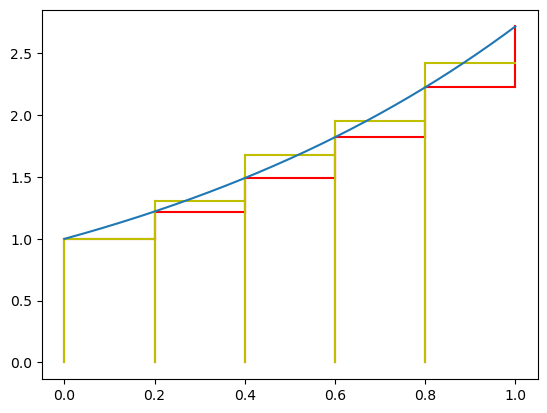

In [12]:
type_of_equipment = ['random', 'left']

print_bar_darbu(type_of_equipment)